# 🚚**Assessment of flexible highway pavement deflection using Intelligent Pavement Assessment to estimate deflection in adjacent lanes with the use of Machine Learning.**


## Importing the python libraries and database

### Python libraries

In [1]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers import schedules
from scikeras.wrappers import KerasRegressor
from keras.callbacks import EarlyStopping
from matplotlib.gridspec import GridSpec
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout
from tensorflow import keras
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Database

In [2]:
df = pd.read_excel('bds/base_tratada_r1.xlsx')
df.head()

,ID_FWD,D0_FWD,ID_IPAVE,SCI_200,SCI_300,SCI_SUBGRADE,D0,D100,D200,D300,...,D600,D900,D1200,D1500,D1800,IRI_AVG (in/mi),SURVEY_SPEED,VT_AR,VT_PAV,DISTANCE
0,18093,25.4,206973,69.0,112.6,-13.2,253.9,228.6,184.9,141.3,...,49.0,22.1,14.4,8.9,5.1,1.43,71.8,3.6,8.0,0.005234
1,14722,46.9,1132107,316.1,412.6,-8.8,530.7,400.5,214.6,118.1,...,30.8,14.7,9.6,5.9,3.4,11.65,74.1,-2.5,-4.4,0.002933
2,99319,24.3,651534,70.9,110.1,-14.2,207.4,181.2,136.5,97.3,...,41.1,20.6,11.0,6.4,3.7,1.00,41.4,-1.0,2.9,0.004127
3,81996,36.2,748867,98.9,147.4,-16.8,301.3,263.2,202.5,153.9,...,61.8,28.0,18.2,11.2,6.4,1.74,77.9,-4.9,-7.2,0.002984
4,162716,13.8,449240,33.1,51.4,-9.6,111.0,98.5,78.0,59.6,...,26.8,14.5,8.3,5.0,2.9,1.07,74.0,-3.4,-14.7,0.004573


## Processing the data

### Deleting records with missing data

In [3]:
df.dropna(inplace=True)
df

,ID_FWD,D0_FWD,ID_IPAVE,SCI_200,SCI_300,SCI_SUBGRADE,D0,D100,D200,D300,...,D600,D900,D1200,D1500,D1800,IRI_AVG (in/mi),SURVEY_SPEED,VT_AR,VT_PAV,DISTANCE
0,18093,25.4,206973,69.0,112.6,-13.2,253.9,228.6,184.9,141.3,...,49.0,22.1,14.4,8.9,5.1,1.43,71.8,3.6,8.0,0.005234
1,14722,46.9,1132107,316.1,412.6,-8.8,530.7,400.5,214.6,118.1,...,30.8,14.7,9.6,5.9,3.4,11.65,74.1,-2.5,-4.4,0.002933
2,99319,24.3,651534,70.9,110.1,-14.2,207.4,181.2,136.5,97.3,...,41.1,20.6,11.0,6.4,3.7,1.00,41.4,-1.0,2.9,0.004127
3,81996,36.2,748867,98.9,147.4,-16.8,301.3,263.2,202.5,153.9,...,61.8,28.0,18.2,11.2,6.4,1.74,77.9,-4.9,-7.2,0.002984
4,162716,13.8,449240,33.1,51.4,-9.6,111.0,98.5,78.0,59.6,...,26.8,14.5,8.3,5.0,2.9,1.07,74.0,-3.4,-14.7,0.004573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11730,177163,46.6,893393,87.5,130.5,-3.6,210.7,177.3,123.3,80.2,...,18.6,6.0,3.8,2.3,1.3,1.81,68.1,6.8,9.1,0.005054
11731,262236,62.6,1071439,219.4,323.9,-4.7,490.9,406.3,271.5,167.0,...,28.8,7.7,5.0,3.0,1.7,1.36,54.2,-4.0,-3.6,0.003228
11732,264868,43.7,1088671,287.6,395.9,-43.9,632.0,517.2,344.4,236.1,...,116.2,75.3,48.7,31.5,19.4,1.86,67.5,-4.3,-2.7,0.005397
11733,99123,70.3,655455,69.3,114.0,-25.1,269.1,245.0,199.8,155.1,...,76.6,49.8,35.7,24.6,16.1,1.63,79.3,1.3,8.3,0.004847


### Defining the variable of interest

In [4]:
y = df['D0_FWD']
y.head()

0    25.4
1    46.9
2    24.3
3    36.2
4    13.8
Name: D0_FWD, dtype: float64

### Defining the predictor variables

In [5]:
x = df.drop(df.columns[[0, 1, 2]], axis = 1)
x.head()

,SCI_200,SCI_300,SCI_SUBGRADE,D0,D100,D200,D300,D450,D600,D900,D1200,D1500,D1800,IRI_AVG (in/mi),SURVEY_SPEED,VT_AR,VT_PAV,DISTANCE
0,69.0,112.6,-13.2,253.9,228.6,184.9,141.3,84.8,49.0,22.1,14.4,8.9,5.1,1.43,71.8,3.6,8.0,0.005234
1,316.1,412.6,-8.8,530.7,400.5,214.6,118.1,56.7,30.8,14.7,9.6,5.9,3.4,11.65,74.1,-2.5,-4.4,0.002933
2,70.9,110.1,-14.2,207.4,181.2,136.5,97.3,61.4,41.1,20.6,11.0,6.4,3.7,1.00,41.4,-1.0,2.9,0.004127
3,98.9,147.4,-16.8,301.3,263.2,202.5,153.9,100.3,61.8,28.0,18.2,11.2,6.4,1.74,77.9,-4.9,-7.2,0.002984
4,33.1,51.4,-9.6,111.0,98.5,78.0,59.6,39.1,26.8,14.5,8.3,5.0,2.9,1.07,74.0,-3.4,-14.7,0.004573


### Removing correlated features

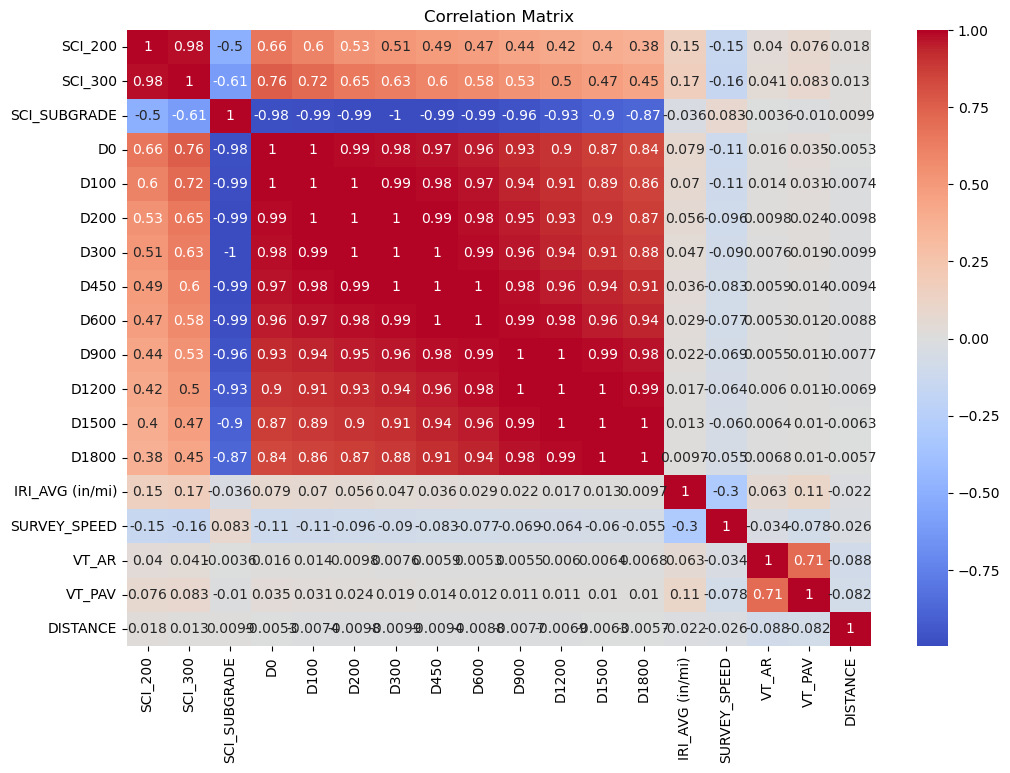

In [6]:
x_df = pd.DataFrame(x)
correlation_matrix = x_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [7]:
correlation_matrix = x_df.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] >= 0.8)]

x_df = x_df.drop(to_drop, axis=1)
x = x_df

In [8]:
x.head()

,SCI_200,SCI_SUBGRADE,IRI_AVG (in/mi),SURVEY_SPEED,VT_AR,VT_PAV,DISTANCE
0,69.0,-13.2,1.43,71.8,3.6,8.0,0.005234
1,316.1,-8.8,11.65,74.1,-2.5,-4.4,0.002933
2,70.9,-14.2,1.00,41.4,-1.0,2.9,0.004127
3,98.9,-16.8,1.74,77.9,-4.9,-7.2,0.002984
4,33.1,-9.6,1.07,74.0,-3.4,-14.7,0.004573


### Separating training and testing data

In [9]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.33, random_state=0)

### Applying preprocessing algorithm (standardization)

In [10]:
scaler_x = StandardScaler()
x_treino = scaler_x.fit_transform(x_treino)
x_teste = scaler_x.transform(x_teste)

## Deep Neural Network (DNN)

### Aplly Grid Search

In [11]:
# def create_model(optimizer='adam', activation='relu', layers=1, neurons=10, learning_rate=0.01, momentum=0.9, dropout_rate=0.0):
#     model = Sequential()
#     for i in range(layers):
#         if i == 0:
#             model.add(Dense(neurons, input_dim=x_treino.shape[1], activation=activation))
#         else:
#             model.add(Dense(neurons, activation=activation))
#         model.add(Dropout(dropout_rate))
#     model.add(Dense(1, activation='linear'))
#     if optimizer == 'adam':
#         opt = Adam(learning_rate=learning_rate)
#     model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_absolute_error'])
#     return model

# model = KerasRegressor(model=create_model, verbose=0)

# param_grid = {
#     'model__optimizer': ['adam'],
#     'model__activation': ['relu', 'tanh'],
#     'batch_size': [16, 32, 48, 64],
#     'epochs': [50, 100, 150],
#     'model__layers': [2, 4, 5, 6],  # Número de camadas ocultas
#     'model__neurons': [20, 30, 40, 50],  # Neurônios por camada
# }

# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(x_treino, y_treino)  # Usar os dados de treino aqui


# best_model = grid_result.best_estimator_
# test_accuracy = best_model.score(x_teste, y_teste)

# print("Best: %f param %s" % (grid_result.best_score_, grid_result.best_params_))
# print("Acuracy: %f" % test_accuracy)


### Apply DNN

Create the DNN architecture

In [12]:
modelo = Sequential()
modelo.add(Dense(units=20, activation="tanh", input_dim=x_treino.shape[1]))
modelo.add(Dense(units=20, activation="tanh"))
modelo.add(Dense(units=1, activation="linear"))

Compiling and training the model with the selected hyperparameters

In [13]:
modelo.compile(loss='mse', optimizer='adam', metrics=['mae'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
resultado = modelo.fit(x_treino, y_treino, epochs=50, batch_size=64, validation_data=(x_teste, y_teste), callbacks=[early_stopping])


Epoch 1/50


121/121 [==============================] - 1s 3ms/step - loss: 1811.2531 - mae: 36.7690 - val_loss: 1784.7411 - val_mae: 35.7494
Epoch 2/50
121/121 [==============================] - 0s 2ms/step - loss: 1483.1562 - mae: 32.0668 - val_loss: 1307.8972 - val_mae: 28.5090
Epoch 3/50
121/121 [==============================] - 0s 2ms/step - loss: 1117.4225 - mae: 25.7948 - val_loss: 1079.4823 - val_mae: 24.1445
Epoch 4/50
121/121 [==============================] - 0s 2ms/step - loss: 949.8431 - mae: 22.4674 - val_loss: 946.5341 - val_mae: 21.5250
Epoch 5/50
121/121 [==============================] - 0s 2ms/step - loss: 836.7302 - mae: 20.2606 - val_loss: 847.5245 - val_mae: 19.6899
Epoch 6/50
121/121 [==============================] - 0s 2ms/step - loss: 749.9341 - mae: 18.6525 - val_loss: 769.7107 - val_mae: 18.3455
Epoch 7/50
121/121 [==============================] - 0s 2ms/step - loss: 681.6066 - mae: 17.4583 - val_loss: 707.7546 - val_mae: 17.3453
Epoch 8/50
121/121 [=====

Calculating performance metrics

In [14]:
# Make predictions on the test set
y_pred = modelo.predict(x_teste).flatten()

# Calculate performance metrics
mse = mean_squared_error(y_teste,  y_pred)
mae = mean_absolute_error(y_teste,  y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_teste,  y_pred)

# Print metrics
print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("R²: ", r2)

119/119 [==============================] - 0s 926us/step
MSE:  348.70071995425275
MAE:  12.861430641152248
RMSE:  18.673529927527166
R²:  0.3070554006757996


Plotting performance results

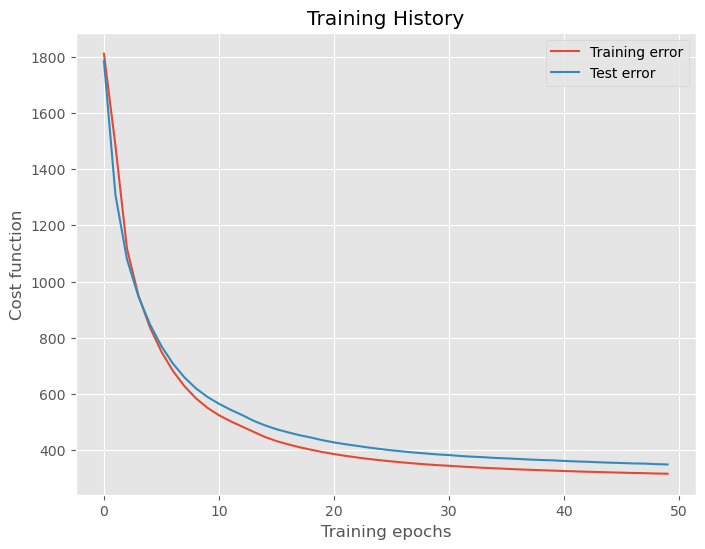

In [15]:
# Define style
plt.style.use('ggplot')

# Line chart
plt.figure(figsize=(8, 6))
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])

# Set labels and title
plt.title('Training History')
plt.ylabel('Cost function')
plt.xlabel('Training epochs')
plt.legend(['Training error', 'Test error'])

# Show graphic
plt.show()

119/119 [==============================] - 0s 927us/step


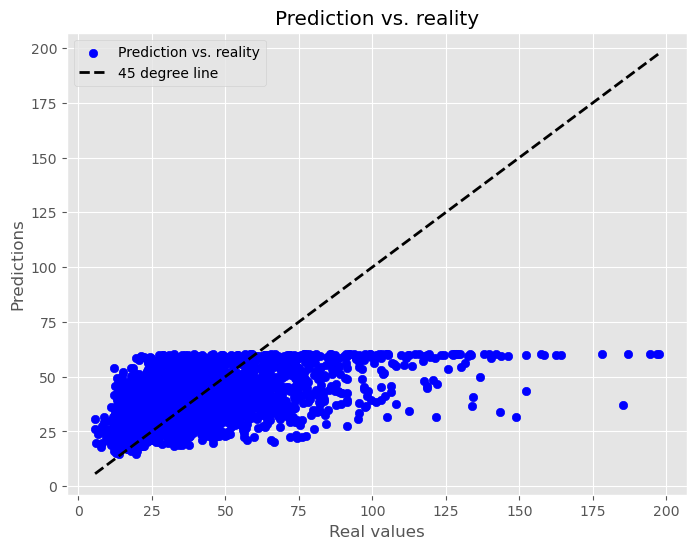

In [16]:
# Make predictions on the test set
y_pred = modelo.predict(x_teste).flatten()

# Define style
plt.style.use('ggplot')

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_teste,  y_pred, c='b', marker='o', label='Prediction vs. reality')

# 45 degree line
plt.plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], 'k--', lw=2, label='45 degree line')

# Set labels and titlea
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.title('Prediction vs. reality')
plt.legend()

# Show graphic
plt.show()


### Cross-validation

In [17]:
# Initialize lists to store performance metrics for each fold
mse_scores = []
mae_scores = []
r2_scores = []
rmse_scores = []

# Initialize lists to store performance metrics at each iteration
mse_per_iteration = []
mae_per_iteration = []

# Number of folds for cross validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)

for train_index, test_index in kf.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and evaluate the model as mentioned previously
    modelo = Sequential()
    modelo.add(Dense(units=20, activation="tanh", input_dim=x_treino.shape[1]))
    modelo.add(Dense(units=20, activation="tanh"))
    modelo.add(Dense(units=1, activation="linear"))
    modelo.compile(loss='mse', optimizer='adam', metrics=['mae'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

    resultado = modelo.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), 
    callbacks=[early_stopping])


    # Calculate performance metrics
    y_pred = modelo.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate the RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mse)

    # Store performance metrics in their respective lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    rmse_scores.append(rmse)

    # Store performance metrics in each iteration
    mse_per_iteration.append(mse)
    mae_per_iteration.append(mae)

Epoch 1/50
145/145 [==============================] - 1s 2ms/step - loss: 1474.5709 - mae: 31.8168 - val_loss: 1337.6322 - val_mae: 28.7272
Epoch 2/50
145/145 [==============================] - 0s 2ms/step - loss: 1156.5359 - mae: 26.4455 - val_loss: 1149.4055 - val_mae: 25.2148
Epoch 3/50
145/145 [==============================] - 0s 2ms/step - loss: 999.4612 - mae: 23.3668 - val_loss: 1010.8871 - val_mae: 22.4975
Epoch 4/50
145/145 [==============================] - 0s 2ms/step - loss: 879.2076 - mae: 20.9970 - val_loss: 901.3555 - val_mae: 20.4279
Epoch 5/50
145/145 [==============================] - 0s 2ms/step - loss: 782.0202 - mae: 19.1512 - val_loss: 812.3372 - val_mae: 18.8651
Epoch 6/50
145/145 [==============================] - 0s 2ms/step - loss: 703.7463 - mae: 17.7861 - val_loss: 740.3301 - val_mae: 17.6992
Epoch 7/50
145/145 [==============================] - 0s 2ms/step - loss: 640.9901 - mae: 16.7594 - val_loss: 683.2186 - val_mae: 16.8629
Epoch 8/50
145/145 [=========

145/145 [==============================] - 0s 2ms/step - loss: 612.5645 - mae: 16.1906 - val_loss: 552.7694 - val_mae: 15.6505
Epoch 10/50
145/145 [==============================] - 0s 2ms/step - loss: 575.1300 - mae: 15.7300 - val_loss: 520.4112 - val_mae: 15.2200
Epoch 11/50
145/145 [==============================] - 0s 2ms/step - loss: 543.9730 - mae: 15.3197 - val_loss: 491.3617 - val_mae: 14.6439
Epoch 12/50
145/145 [==============================] - 0s 2ms/step - loss: 514.2960 - mae: 14.7314 - val_loss: 466.6961 - val_mae: 14.2456
Epoch 13/50
145/145 [==============================] - 0s 2ms/step - loss: 490.5628 - mae: 14.4100 - val_loss: 446.6208 - val_mae: 13.9694
Epoch 14/50
145/145 [==============================] - 0s 2ms/step - loss: 470.9268 - mae: 14.1908 - val_loss: 429.5998 - val_mae: 13.7560
Epoch 15/50
145/145 [==============================] - 0s 2ms/step - loss: 454.3336 - mae: 13.9589 - val_loss: 414.8637 - val_mae: 13.5205
Epoch 16/50
145/145 [==================

145/145 [==============================] - 0s 2ms/step - loss: 424.6695 - mae: 13.5935 - val_loss: 410.5787 - val_mae: 13.6563
Epoch 18/50
145/145 [==============================] - 0s 2ms/step - loss: 415.1080 - mae: 13.4992 - val_loss: 400.4605 - val_mae: 13.7048
Epoch 19/50
145/145 [==============================] - 0s 2ms/step - loss: 409.2662 - mae: 13.5602 - val_loss: 395.2928 - val_mae: 13.6342
Epoch 20/50
145/145 [==============================] - 0s 2ms/step - loss: 400.5671 - mae: 13.4360 - val_loss: 389.9841 - val_mae: 13.4962
Epoch 21/50
145/145 [==============================] - 0s 2ms/step - loss: 394.3040 - mae: 13.3208 - val_loss: 383.2116 - val_mae: 13.5248
Epoch 22/50
145/145 [==============================] - 0s 2ms/step - loss: 388.6068 - mae: 13.3223 - val_loss: 378.7087 - val_mae: 13.4339
Epoch 23/50
145/145 [==============================] - 0s 2ms/step - loss: 383.9965 - mae: 13.2439 - val_loss: 373.7609 - val_mae: 13.3856
Epoch 24/50
145/145 [==================

145/145 [==============================] - 0s 2ms/step - loss: 371.8260 - mae: 13.2422 - val_loss: 377.3408 - val_mae: 13.3598
Epoch 26/50
145/145 [==============================] - 0s 2ms/step - loss: 368.7547 - mae: 13.2262 - val_loss: 374.1333 - val_mae: 13.2425
Epoch 27/50
145/145 [==============================] - 0s 2ms/step - loss: 366.4812 - mae: 13.2063 - val_loss: 372.5762 - val_mae: 13.3512
Epoch 28/50
145/145 [==============================] - 0s 2ms/step - loss: 364.4847 - mae: 13.1969 - val_loss: 369.3228 - val_mae: 13.3946
Epoch 29/50
145/145 [==============================] - 0s 2ms/step - loss: 361.6426 - mae: 13.1905 - val_loss: 365.7521 - val_mae: 13.2818
Epoch 30/50
145/145 [==============================] - 0s 2ms/step - loss: 359.3680 - mae: 13.1611 - val_loss: 365.6213 - val_mae: 13.2871
Epoch 31/50
145/145 [==============================] - 0s 2ms/step - loss: 358.1645 - mae: 13.1378 - val_loss: 360.9487 - val_mae: 13.2462
Epoch 32/50
145/145 [==================

145/145 [==============================] - 0s 2ms/step - loss: 355.2007 - mae: 13.1051 - val_loss: 350.0918 - val_mae: 13.0862
Epoch 34/50
145/145 [==============================] - 0s 2ms/step - loss: 352.6555 - mae: 13.0578 - val_loss: 348.1559 - val_mae: 13.1278
Epoch 35/50
145/145 [==============================] - 0s 2ms/step - loss: 350.7170 - mae: 13.0545 - val_loss: 346.9192 - val_mae: 13.0557
Epoch 36/50
145/145 [==============================] - 0s 2ms/step - loss: 349.4719 - mae: 13.0431 - val_loss: 345.2367 - val_mae: 13.0979
Epoch 37/50
145/145 [==============================] - 0s 1ms/step - loss: 347.8307 - mae: 13.0240 - val_loss: 345.6458 - val_mae: 13.1432
Epoch 38/50
145/145 [==============================] - 0s 1ms/step - loss: 346.2287 - mae: 13.0438 - val_loss: 344.3866 - val_mae: 13.0576
Epoch 39/50
145/145 [==============================] - 0s 2ms/step - loss: 344.0751 - mae: 13.0100 - val_loss: 342.5063 - val_mae: 13.0117
Epoch 40/50
145/145 [==================

Calculating performance metrics

In [18]:
# Calculate summary metrics
avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)

# Display or store summary metrics
print("MSE Average:", avg_mse)
print("MAE Average:", avg_mae)
print("RMSE Average:", avg_rmse)
print("R² Average:", avg_r2)

MSE Average: 340.97875517654404
MAE Average: 13.024475701741034
RMSE Average: 18.459316577907348
R² Average: 0.2764407598030231


Plotting performance results

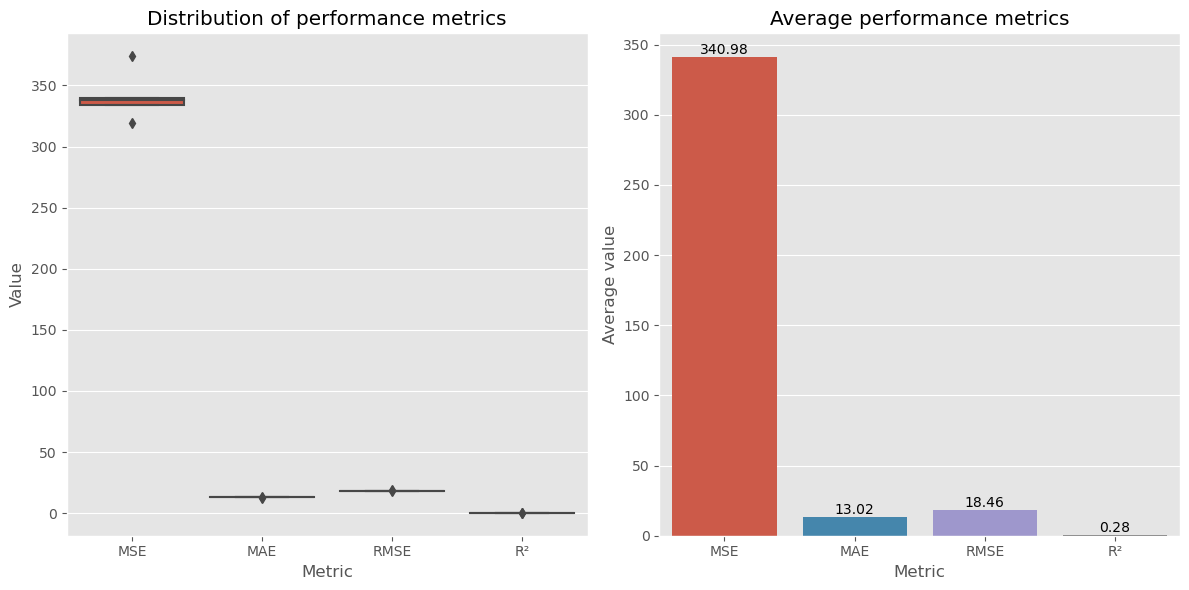

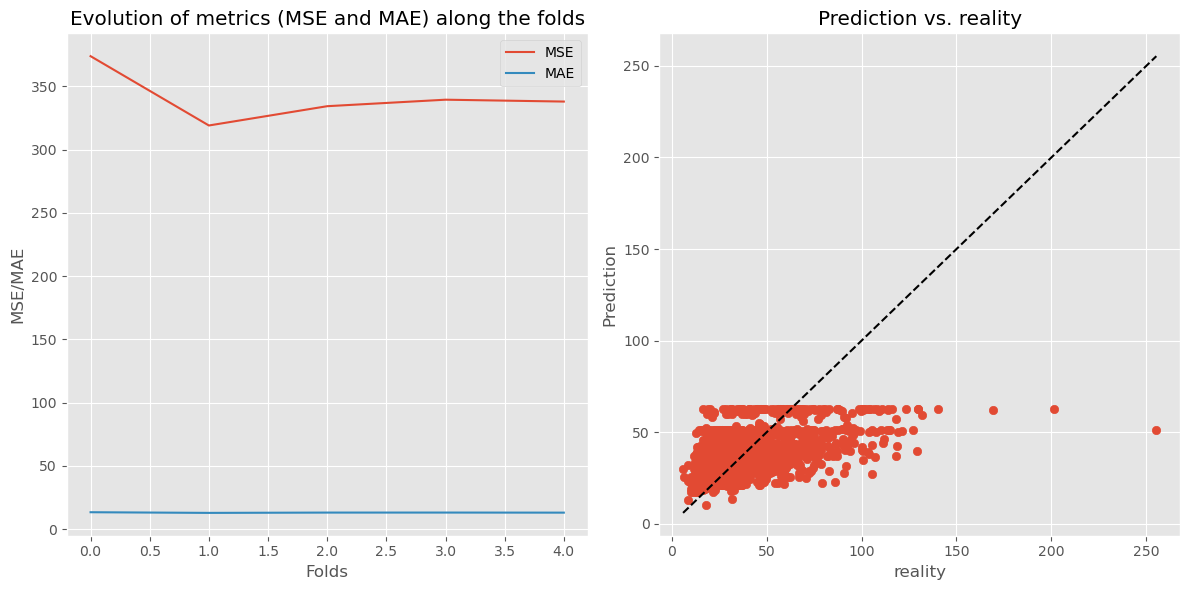

In [19]:
# Metrics data for all folds
mse_scores
mae_scores
rmse_scores
r2_scores

# Box Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ax = sns.boxplot(data=[mse_scores, mae_scores, rmse_scores, r2_scores])
plt.xticks([0, 1, 2, 3], ['MSE', 'MAE', 'RMSE', 'R²'])
plt.title('Distribution of performance metrics')
plt.xlabel('Metric')
plt.ylabel('Value')


# Bar Chart
plt.subplot(1, 2, 2)
metricas_medias = [np.mean(mse_scores), np.mean(mae_scores), np.mean(rmse_scores), np.mean(r2_scores)]
metricas_labels = ['MSE', 'MAE', 'RMSE', 'R²']
sns.barplot(x=metricas_labels, y=metricas_medias)
plt.ylabel('Average value')
plt.title('Average performance metrics')
plt.xlabel('Metric')

for i, value in enumerate(metricas_medias):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()

# Line Chart
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mse_per_iteration, label='MSE')
plt.plot(mae_per_iteration, label='MAE')
plt.title('Evolution of metrics (MSE and MAE) along the folds')
plt.xlabel('Folds')
plt.ylabel('MSE/MAE')
plt.legend()
plt.xlabel('Folds')
plt.ylabel('MSE/MAE')


# Scater plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred)
plt.title('Prediction vs. reality')
plt.xlabel('reality')
plt.ylabel('Prediction')

min_value = min(min(y_test), min(y_pred))
max_value = max(max(y_test), max(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], linestyle='--', color='black')

plt.tight_layout()

# Show graphics
plt.show()


## Random Forest (RF)

### Apply GridSearch

In [20]:
# # Inicializando o modelo de Floresta Aleatória
# rf_model = RandomForestRegressor(random_state=0)

# # Definindo os hiperparâmetros que você gostaria de ajustar
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [5, 10, 15, 20],
#     'min_samples_leaf': [1, 2, 5, 10],
#     'min_samples_split': [2, 5, 10, 15],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Inicializando o GridSearchCV
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # Ajustando o GridSearchCV
# grid_search.fit(x_treino, y_treino)

# # Obtendo os melhores parâmetros
# best_params = grid_search.best_params_
# print("Melhores parâmetros: ", best_params)

# # Treinando o modelo com os melhores parâmetros
# rf_model_best = RandomForestRegressor(
#     n_estimators=best_params['n_estimators'],
#     max_depth=best_params['max_depth'],
#     min_samples_leaf=best_params['min_samples_leaf'],
#     min_samples_split=best_params['min_samples_split'],
#     max_features=best_params['max_features'],
#     bootstrap=True,
#     random_state=0
# )
# rf_model_best.fit(x_treino, y_treino)

# # Fazendo previsões com o modelo otimizado
# y_pred_rf_best = rf_model_best.predict(x_teste)


### Apply RF

Create the RF architecture

In [21]:
estimator = 500
max_depth = 15
min_samples_leaf = 2
min_samples_split = 2
max_features = 'sqrt'

rf_model = RandomForestRegressor(
    n_estimators=estimator,
    max_depth=max_depth,
    min_samples_leaf=min_samples_leaf,
    min_samples_split=min_samples_split,
    max_features=max_features,
    bootstrap=True,
    random_state=0
)

Compiling and training the model with the selected hyperparameters

In [22]:
rf_model.fit(x_treino, y_treino)
y_pred_rf = rf_model.predict(x_teste)
y_pred_rf_treino = rf_model.predict(x_treino)

Calculating performance metrics

In [23]:
mse_rf = mean_squared_error(y_teste, y_pred_rf)
mae_rf = mean_absolute_error(y_teste, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_teste, y_pred_rf)

print("RF Performance:")
print("MSE: ", mse_rf)
print("MAE: ", mae_rf)
print("RMSE: ", rmse_rf)
print("R²: ", r2_rf)

RF Performance:
MSE:  315.24949587343525
MAE:  12.42546339677321
RMSE:  17.755266708034416
R²:  0.37353029946759775


Plotting performance results

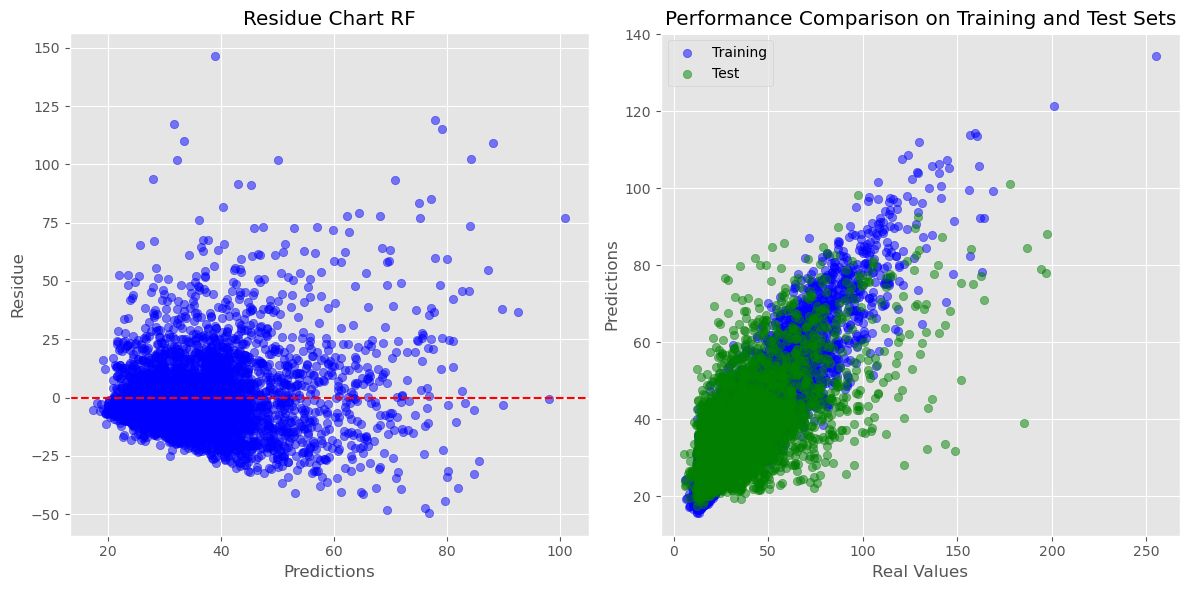

In [24]:
# Calculate residuals (difference between actual values and predictions)
residuals = y_teste - y_pred_rf

# Create a waste chart
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Define style
plt.style.use('ggplot')

# Residue Chart
axes[0].scatter(y_pred_rf, residuals, color='blue', alpha=0.5)
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Predictions')
axes[0].set_ylabel('Residue')
axes[0].set_title('Residue Chart RF')

# Create a scatterplot to compare predictions with actual values in the training and testing sets
axes[1].scatter(y_treino, y_pred_rf_treino, color='blue', label='Training', alpha=0.5)
axes[1].scatter(y_teste, y_pred_rf, color='green', label='Test', alpha=0.5)
axes[1].set_xlabel('Real Values')
axes[1].set_ylabel('Predictions')
axes[1].set_title('Performance Comparison on Training and Test Sets')
axes[1].legend()

# Show graphics
plt.tight_layout()
plt.show()

### Cross-validation

In [25]:
# Initialize lists to store performance metrics for each fold
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Number of folds for cross validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)


for train_index, test_index in kf.split(x_treino):  # x_treino são as suas variáveis de entrada de treinamento
    X_train, X_test = x_treino[train_index], x_treino[test_index]
    y_train, y_test = y_treino.iloc[train_index], y_treino.iloc[test_index]

    # Train and evaluate the model as mentioned previously
    estimator = 500
    max_depth = 15
    min_samples_leaf = 2
    min_samples_split = 2
    max_features = 'sqrt'

    rf_model = RandomForestRegressor(
          n_estimators=estimator,
          max_depth=max_depth,
          min_samples_leaf=min_samples_leaf,
          min_samples_split=min_samples_split,
          max_features=max_features,
          bootstrap=True,
          random_state=0
    )
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store performance metrics in their respective lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

Calculating performance metrics

In [26]:
# Calculate summary metrics
avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)

# Display or store summary metrics
print("MSE Average:", avg_mse)
print("MAE Average:", avg_mae)
print("RMSE Average:", avg_rmse)
print("R² Average:", avg_r2)

MSE Average: 301.1801731241285
MAE Average: 12.383075974947731
RMSE Average: 17.347748133586514
R² Average: 0.33606734848010056


Plotting performance results

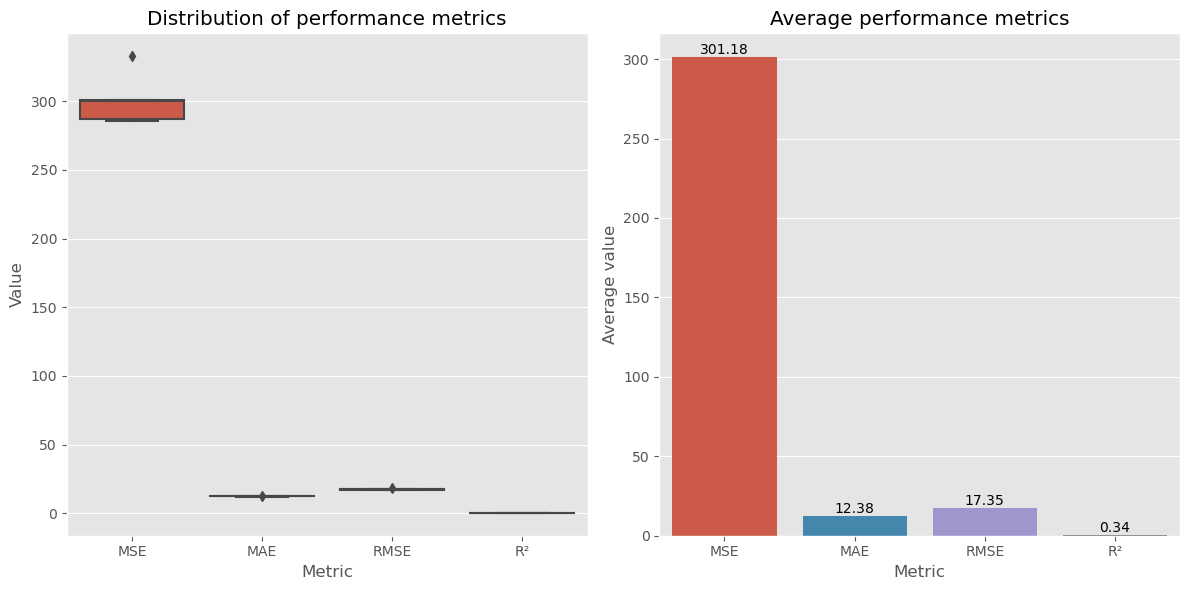

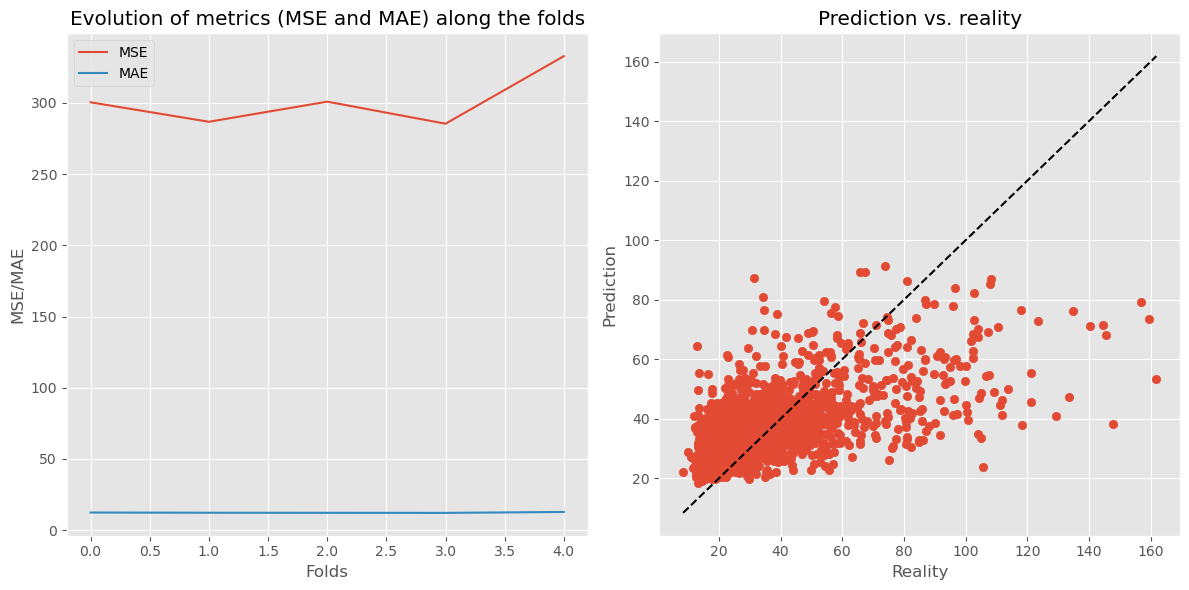

In [27]:
# Box Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ax = sns.boxplot(data=[mse_scores, mae_scores, rmse_scores, r2_scores])
plt.xticks([0, 1, 2, 3], ['MSE', 'MAE', 'RMSE', 'R²'])
plt.title('Distribution of performance metrics')
plt.xlabel('Metric')
plt.ylabel('Value')

# Bar Chart
plt.subplot(1, 2, 2)
metricas_medias = [np.mean(mse_scores), np.mean(mae_scores), np.mean(rmse_scores), np.mean(r2_scores)]
metricas_labels = ['MSE', 'MAE', 'RMSE', 'R²']
sns.barplot(x=metricas_labels, y=metricas_medias)
plt.ylabel('Average value')
plt.title('Average performance metrics')
plt.xlabel('Metric')

for i, value in enumerate(metricas_medias):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()

# Line Chart
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mse_scores, label='MSE')
plt.plot(mae_scores, label='MAE')
plt.title('Evolution of metrics (MSE and MAE) along the folds')
plt.xlabel('Folds')
plt.ylabel('MSE/MAE')
plt.legend()
plt.xlabel('Folds')
plt.ylabel('MSE/MAE')

# Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred)
plt.title('Prediction vs. reality')
plt.xlabel('Reality')
plt.ylabel('Prediction')

min_value = min(min(y_test), min(y_pred))
max_value = max(max(y_test), max(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], linestyle='--', color='black')

plt.tight_layout()

# Show graphics
plt.show()


## Ensemble Prediction (EP)

### Aplly EP

Base model 1 (RF)

In [28]:
estimator = 500
max_depth = 15
min_samples_leaf = 2
min_samples_split = 2
max_features = 'sqrt'

rf_model = RandomForestRegressor(
    n_estimators=estimator,
    max_depth=max_depth,
    min_samples_leaf=min_samples_leaf,
    min_samples_split=min_samples_split,
    max_features=max_features,
    bootstrap=True,
    random_state=0
)
rf_model.fit(x_treino, y_treino)
y_pred_rf = rf_model.predict(x_teste)

Base model 2 (DNN)

In [29]:
rna_model = Sequential()
rna_model.add(Dense(units=20, activation='tanh', input_dim=x_treino.shape[1]))
rna_model.add(Dense(units=20, activation='tanh'))
rna_model.add(Dense(units=1, activation='linear'))
rna_model.compile(loss='mse', optimizer='adam')
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
rna_model.fit(x_treino, y_treino, epochs=50, batch_size=64, verbose=0, callbacks=[early_stopping])
y_pred_rna = rna_model.predict(x_teste).flatten()

119/119 [==============================] - 0s 927us/step


Compiling and training the top-level model (meta-model)

In [30]:
# Combine predictions from base models into a new dataset
ensemble_data = pd.DataFrame({'RF_Prediction': y_pred_rf, 'RNA_Prediction': y_pred_rna})

# Train a top-level model (meta-model)
meta_model = RandomForestRegressor(n_estimators=500, random_state=0)
meta_model.fit(ensemble_data, y_teste)

# Make predictions with the final model
ensemble_predictions = meta_model.predict(ensemble_data)

Calculating performance metrics

In [31]:
mae_ensemble = mean_absolute_error(y_teste, ensemble_predictions)
mse_ensemble = mean_squared_error(y_teste, ensemble_predictions)
rmse_ensemble = np.sqrt(mse_ensemble)
r2_ensemble = r2_score(y_teste, ensemble_predictions)

print("EP Performance")
print("MAE: ", mae_ensemble)
print("MSE: ", mse_ensemble)
print("RMSE: ", rmse_ensemble)
print("R²: ", r2_ensemble)

EP Performance
MAE:  4.954910901919535
MSE:  49.39867681125469
RMSE:  7.028419225633506
R²:  0.9018340245623485


Plotting performance results

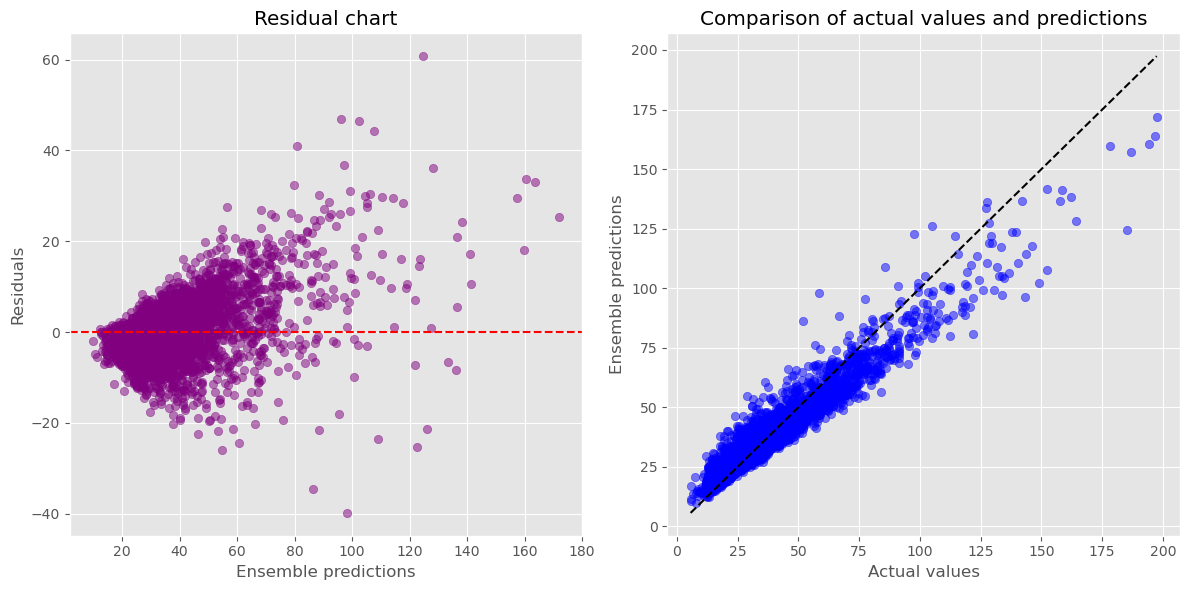

In [32]:
# Calculate residuals (difference between actual values and ensemble predictions)
residuals_ensemble = y_teste - ensemble_predictions

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Define style
plt.style.use('ggplot')

# Residual Chart for Ensemble
axes[0].scatter(ensemble_predictions, residuals_ensemble, color='purple', alpha=0.5)
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Ensemble predictions')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual chart')

# Scatter plot to compare ensemble predictions with actual values
axes[1].scatter(y_teste, ensemble_predictions, color='blue', alpha=0.5)
axes[1].plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], linestyle='--', color='black')
axes[1].set_xlabel('Actual values')
axes[1].set_ylabel('Ensemble predictions')
axes[1].set_title('Comparison of actual values and predictions')

# Show graphics
plt.tight_layout()
plt.show()


### Aplly Cross-validation

73/73 [==============================] - 0s 1ms/step


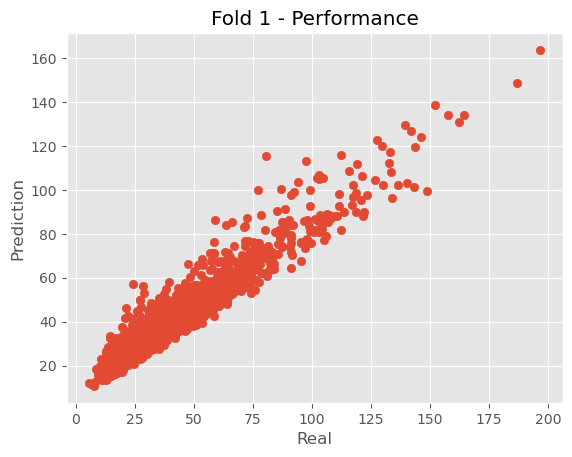

73/73 [==============================] - 0s 1ms/step


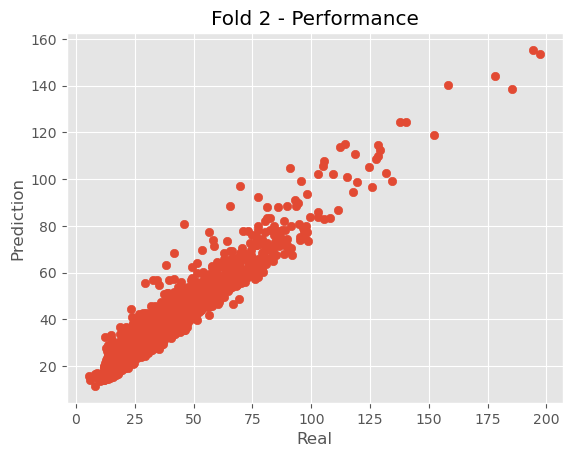

73/73 [==============================] - 0s 867us/step


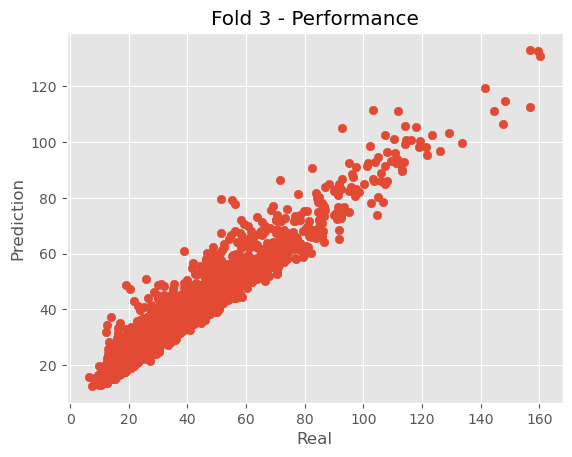

72/72 [==============================] - 0s 893us/step


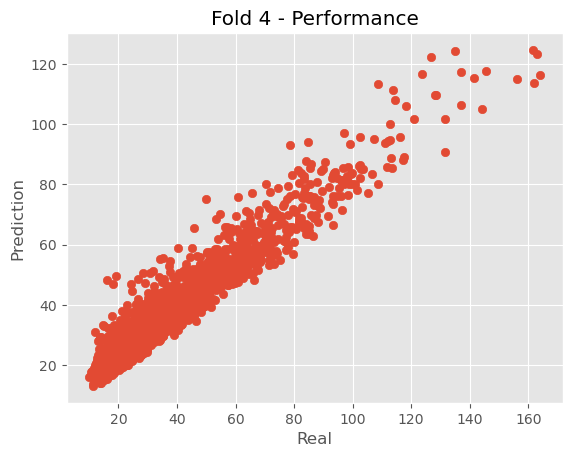

72/72 [==============================] - 0s 1ms/step


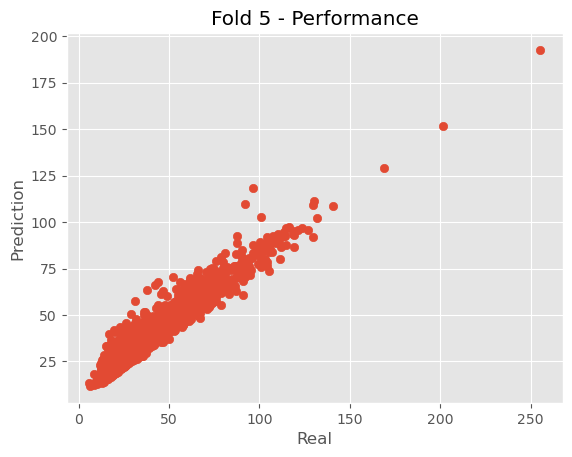

In [33]:
# Set the number of cross-validation folds
num_folds = 5
kf = KFold(n_splits=num_folds, random_state=0, shuffle=True)

# Lists to store performance metrics for each fold
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

# Initialize the fold index
fold_index = 1

# Loop over the folds
for train_index, test_index in kf.split(x):
    x_treino, x_teste = x.iloc[train_index], x.iloc[test_index]
    y_treino, y_teste = y.iloc[train_index], y.iloc[test_index]

    # Train a Random Forest model (base model 1)
    estimator = 500
    max_depth = 15
    min_samples_leaf = 2
    min_samples_split = 2
    max_features = 'sqrt'

    rf_model = RandomForestRegressor(
        n_estimators=estimator,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        min_samples_split=min_samples_split,
        max_features=max_features,
        bootstrap=True,
        random_state=0
    )
    rf_model.fit(x_treino, y_treino)
    y_pred_rf = rf_model.predict(x_teste)

    # Train an Artificial Neural Network (base model 2)
    rna_model = Sequential()
    rna_model.add(Dense(units=20, activation='tanh', input_dim=x_treino.shape[1]))
    rna_model.add(Dense(units=20, activation='tanh'))
    rna_model.add(Dense(units=1, activation='linear'))
    rna_model.compile(loss='mse', optimizer='adam')
    early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
    rna_model.fit(x_treino, y_treino, epochs=50, batch_size=64, verbose=0, callbacks=[early_stopping])
    y_pred_rna = rna_model.predict(x_teste).flatten()

    # Combine predictions from base models into a new dataset
    ensemble_data = pd.DataFrame({'RF_Prediction': y_pred_rf, 'RNA_Prediction': y_pred_rna})

    # Train a top-level model (meta-model)
    meta_model = RandomForestRegressor(n_estimators=500, random_state=0)
    meta_model.fit(ensemble_data, y_teste)

    # Make predictions with the final model
    ensemble_predictions = meta_model.predict(ensemble_data)

    # Calculate performance metrics for this fold
    mae = mean_absolute_error(y_teste, ensemble_predictions)
    mse = mean_squared_error(y_teste, ensemble_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_teste, ensemble_predictions)

    # Store metrics in their respective lists
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    # Create a performance graph for this fold
    plt.figure()
    plt.scatter(y_teste, ensemble_predictions)
    plt.title(f'Fold {fold_index} - Performance')
    plt.xlabel('Real')
    plt.ylabel('Prediction')
    plt.show()

    # Increment the fold index
    fold_index += 1

Calculating performance metrics

In [36]:
# Calculate the means and standard deviations of the metrics
mae_mean = np.mean(mae_scores)
mae_std = np.std(mae_scores)
mse_mean = np.mean(mse_scores)
mse_std = np.std(mse_scores)
rmse_mean = np.mean(rmse_scores)
rmse_std = np.std(rmse_scores)
r2_mean = np.mean(r2_scores)
r2_std = np.std(r2_scores)

# Print the average metrics
print("MSE Average: ", mse_mean)
print("MAE Average: ", mae_mean)
print("RMSE Average: ", rmse_mean)
print("R² Average: ", r2_mean)


# Print the standard deviations
print("MSE Std: ", mse_std)
print("MAE Std: ", mae_std)
print("RMSE Std: ", rmse_std)
print("R² Std: ", r2_std)

MSE Average:  49.932744386139646
MAE Average:  4.981322368192638
RMSE Average:  7.062055627372094
R² Average:  0.8940580016980093
MSE Std:  3.4294607025775425
MAE Std:  0.11784355823627188
RMSE Std:  0.24518299704869
R² Std:  0.004767741075238168


Plotting performance results

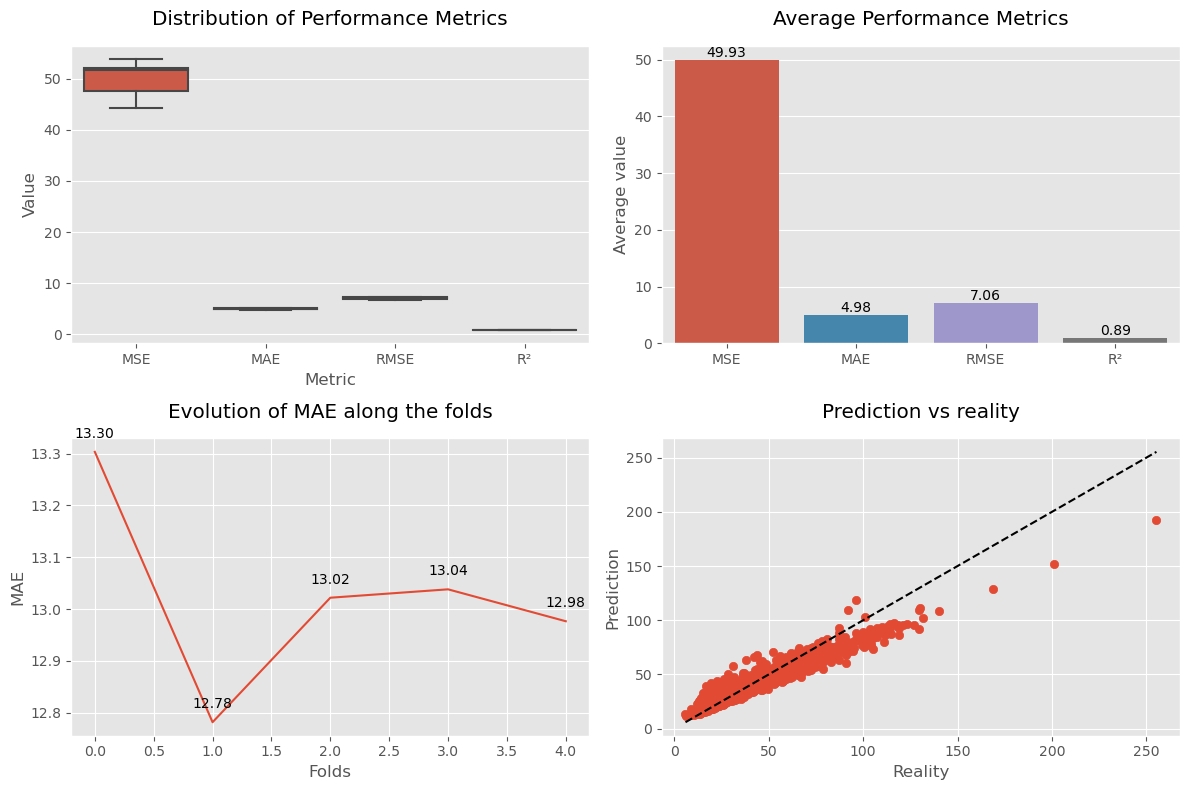

In [35]:
# Create the subplot structure
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 2, figure=fig)
def add_title_with_space(ax, title):
    ax.set_title(title, pad=15)

# Box Plot and Bar Chart
ax1 = fig.add_subplot(gs[0, 0])
ax = sns.boxplot(data=[mse_scores, mae_scores, rmse_scores, r2_scores], ax=ax1)
ax1.set_xticks([0, 1, 2, 3])
ax1.set_xticklabels(['MSE', 'MAE', 'RMSE', 'R²'])
add_title_with_space(ax1, 'Distribution of Performance Metrics')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Value')

ax2 = fig.add_subplot(gs[0, 1])
metricas_medias = [np.mean(mse_scores), np.mean(mae_scores), np.mean(rmse_scores), np.mean(r2_scores)]
sns.barplot(x=metricas_labels, y=metricas_medias, ax=ax2)
ax2.set_ylabel('Average value')
add_title_with_space(ax2, 'Average Performance Metrics')

for i, value in enumerate(metricas_medias):
    ax2.text(i, value, f'{value:.2f}', ha='center', va='bottom')

# Line Chart
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(mae_per_iteration, label='MAE')
add_title_with_space(ax3, 'Evolution of MAE along the folds')
ax3.set_xlabel('Folds')
ax3.set_ylabel('MAE')

for i, mae_value in enumerate(mae_per_iteration):
    ax3.annotate(f'{mae_value:.2f}', (i, mae_value), textcoords="offset points", xytext=(0, 10), ha='center')

# Scatter Plot
ax4 = fig.add_subplot(gs[1, 1])
ax4.scatter(y_teste, ensemble_predictions)
add_title_with_space(ax4, 'Prediction vs reality')
ax4.set_xlabel('Reality')
ax4.set_ylabel('Prediction')

min_value = min(min(y_teste), min(ensemble_predictions))
max_value = max(max(y_teste), max(ensemble_predictions))
ax4.plot([min_value, max_value], [min_value, max_value], linestyle='--', color='black')

plt.tight_layout()
plt.show()
